In [22]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
# Load the balanced dataset
balanced_df = pd.read_csv('crop_recommendation(2).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'crop_recommendation(2).csv'

In [16]:
balanced_df['label'].value_counts()

label
Apple            200
Apricot          200
Plums            200
Pineapple        200
Peaches          200
Papaya           200
Orange           200
Mango            200
Lychee           200
Limes            200
Lemons           200
Kiwi             200
Jackfruit        200
Guava            200
Grapes           200
Dragon Fruit     200
Custard Apple    200
StarFruit        200
Avocado          200
Pomegranates     200
Name: count, dtype: int64

In [17]:
balanced_df['label'].unique()

array(['Apple', 'Apricot', 'Avocado', 'StarFruit', 'Custard Apple',
       'Dragon Fruit', 'Grapes', 'Guava', 'Jackfruit', 'Kiwi', 'Lemons',
       'Limes', 'Lychee', 'Mango', 'Orange', 'Papaya', 'Peaches',
       'Pineapple', 'Plums', 'Pomegranates'], dtype=object)

In [18]:
# Feature scaling
scaler = StandardScaler()
features = balanced_df.drop('label', axis=1)
target = balanced_df['label']
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [19]:
# Splitting the data into train, validation, and test sets
# Splitting the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
import joblib


Epoch 1: Training Accuracy: 0.31214285714285717, Validation Accuracy: 0.3016666666666667, Testing Accuracy: 0.25833333333333336
Epoch 2: Training Accuracy: 0.3482142857142857, Validation Accuracy: 0.32666666666666666, Testing Accuracy: 0.31833333333333336
Epoch 3: Training Accuracy: 0.44107142857142856, Validation Accuracy: 0.4116666666666667, Testing Accuracy: 0.4083333333333333
Epoch 4: Training Accuracy: 0.485, Validation Accuracy: 0.49, Testing Accuracy: 0.5033333333333333
Epoch 5: Training Accuracy: 0.5142857142857142, Validation Accuracy: 0.49333333333333335, Testing Accuracy: 0.5066666666666667
Epoch 6: Training Accuracy: 0.5307142857142857, Validation Accuracy: 0.5083333333333333, Testing Accuracy: 0.525
Epoch 7: Training Accuracy: 0.5378571428571428, Validation Accuracy: 0.52, Testing Accuracy: 0.5316666666666666
Epoch 8: Training Accuracy: 0.5482142857142858, Validation Accuracy: 0.5316666666666666, Testing Accuracy: 0.5283333333333333
Epoch 9: Training Accuracy: 0.5517857142

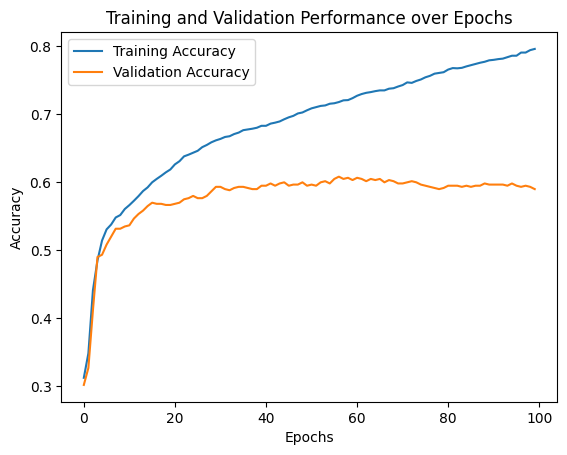

               precision    recall  f1-score   support

        Apple       1.00      0.94      0.97        31
      Apricot       0.56      0.53      0.55        34
      Avocado       0.64      0.41      0.50        39
Custard Apple       0.60      0.53      0.56        34
 Dragon Fruit       0.70      0.53      0.60        30
       Grapes       0.90      0.56      0.69        34
        Guava       0.61      0.54      0.57        37
    Jackfruit       0.40      0.41      0.41        29
         Kiwi       0.46      0.62      0.52        26
       Lemons       0.39      0.52      0.45        25
        Limes       0.48      0.57      0.52        28
       Lychee       0.33      0.23      0.27        30
        Mango       0.71      0.68      0.69        25
       Orange       0.61      0.74      0.67        27
       Papaya       0.81      0.85      0.83        20
      Peaches       0.61      0.53      0.57        32
    Pineapple       0.58      0.71      0.64        31
        P

In [21]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
MLP = MLPClassifier(
    hidden_layer_sizes=(165, 55,165),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    random_state=2,
    max_iter=100,
)
# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")


# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Predicting on the test set
predicted_values = MLP.predict(X_test)
print(classification_report(y_test, predicted_values))

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)


# Calculate and print final testing accuracy
mlp_accuracy= testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", mlp_accuracy)


# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)

In [7]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
MLP = MLPClassifier(
    hidden_layer_sizes=(165, 55, 165),
    activation='relu',
    solver='adam',
    learning_rate=0.001,
    random_state=2,
    max_iter=100)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")


# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Predicting on the test set
predicted_values = MLP.predict(X_test)
print(classification_report(y_test, predicted_values))

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)


# Calculate and print final testing accuracy
mlp_accuracy= testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", mlp_accuracy)


# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


InvalidParameterError: The 'learning_rate' parameter of MLPClassifier must be a str among {'constant', 'invscaling', 'adaptive'}. Got 0.001 instead.

In [9]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest Classifier
RF = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1000,  # Number of trees in the forest
    random_state=0)

# Train the random forest model
RF.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy= RF.score(X_train, y_train)
print("Random Forest Training Accuracy: ", training_accuracy)

# Predicting on the validation set
predicted_values_val = RF.predict(X_val)

# Calculating accuracy on validation set
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Predicting on the test set
predicted_values_test_rf = RF.predict(X_test)


# Calculating accuracy on test set
rf_accuracy= accuracy_score(y_test, predicted_values_test_rf)
print("Random Forest Accuracy on Test Set: ", rf_accuracy)

# Printing classification report
print(classification_report(y_test, predicted_values_test_rf))

# Save the trained model
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(RF, file)

KeyboardInterrupt: 

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier 
DT = DecisionTreeClassifier(
    criterion='gini',#entropy
    splitter='best',
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    ccp_alpha=0.0,
    max_depth=15,
    random_state=0
)

# Train the Decision Tree Classifier
DT.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy_dt = DT.score(X_train, y_train)
print("Decision Tree Training Accuracy: ", training_accuracy_dt)

# Predicting on the validation set
predicted_values_val_dt = DT.predict(X_val)

# Calculating accuracy on validation set
accuracy_val_dt = accuracy_score(y_val, predicted_values_val_dt)
print("Decision Tree Accuracy on Validation Set: ", accuracy_val_dt)

# Predicting on the test set
predicted_values_test_dt = DT.predict(X_test)


# Calculating accuracy on test set
dt_accuracy = accuracy_score(y_test, predicted_values_test_dt)
print("Decision Tree Accuracy on Test Set: ", dt_accuracy)

# Printing classification report
print(classification_report(y_test, predicted_values_test_dt))

# Save the trained model
filename_dt = 'dt_model.pkl'
with open(filename_dt, 'wb') as file_dt:
    joblib.dump(DT, file_dt)


Decision Tree Training Accuracy:  0.49563710099424385
Decision Tree Accuracy on Validation Set:  0.47780830280830283
Decision Tree Accuracy on Test Set:  0.4790598290598291


C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                     Almond       0.29      0.04      0.07       360
                      Apple       0.93      0.96      0.95       338
                    Apricot       0.64      0.43      0.51       353
                    Avocado       0.75      0.41      0.53       364
                      Beans       0.00      0.00      0.00       366
                   Beetroot       0.38      0.15      0.21       357
               Bitter Melon       0.61      0.13      0.21       323
               Bottle Gourd       0.44      0.32      0.37       356
         Brinjal (Eggplant)       0.28      0.06      0.09       356
                   Broccoli       0.00      0.00      0.00       347
                  Buckwheat       0.82      0.58      0.68       324
                    Cabbage       0.10      1.00      0.18       347
     Capsicum (Bell Pepper)       0.00      0.00      0.00       334
                   Cardamom      

C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train the SVM model
svm = SVC(
    C=0.5, 
    kernel='rbf', 
    max_iter=100, 
    tol=1e-5)
svm.fit(X_train, y_train)

# Evaluate the model on the training set
accuracy_train_svm = svm.score(X_train, y_train)
print("SVM Training Accuracy: ", accuracy_train_svm)

# Evaluate the model on the validation set
predicted_values_val_svm = svm.predict(X_val)
accuracy_val_svm = accuracy_score(y_val, predicted_values_val_svm)
print("SVM Accuracy on Validation Set: ", accuracy_val_svm)

# Evaluate the model on the test set
predicted_values_test_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, predicted_values_test_svm)
print("SVM Accuracy on Test Set: ", svm_accuracy)

# Printing classification report
print(classification_report(y_test, predicted_values_test_svm))

# Save the trained SVM model
filename_svm = 'svm_model.pkl'
with open(filename_svm, 'wb') as file_svm:
    joblib.dump(svm, file_svm)


C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MLP Accuracy: 0.5961538461538461
Random Forest Accuracy: 0.5677655677655677
Decision Tree Accuracy: 0.47234432234432233
SVM Accuracy: 0.49340659340659343


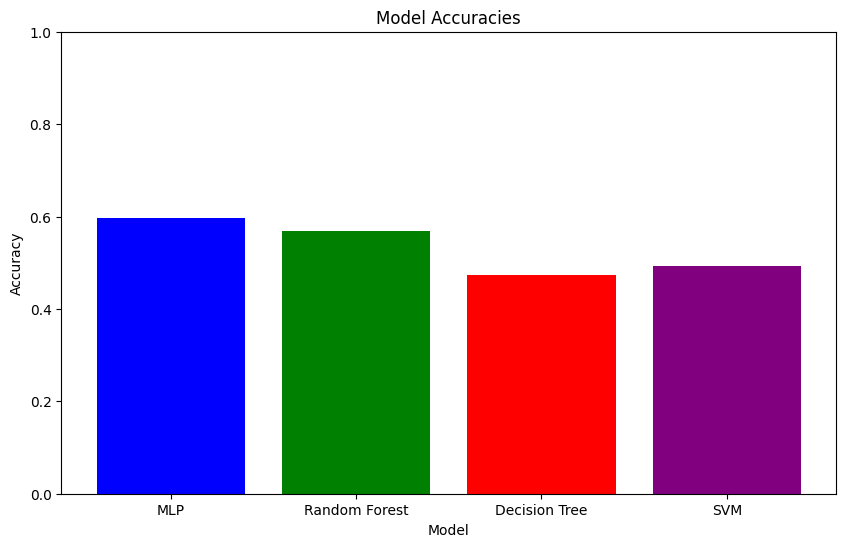

In [19]:
# Define the accuracies and model names
model_accuracies = [mlp_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]
model_names = ["MLP", "Random Forest", "Decision Tree", "SVM"]

# Print accuracies
for model_name, accuracy in zip(model_names, model_accuracies):
    print(f"{model_name} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1
plt.show()

In [22]:
import joblib

# Save the best model
import shutil

# Assuming you have variables mlp_accuracy and rf_accuracy containing their accuracies
best_model = max([("mlp_model.pkl", mlp_accuracy), ("rf_model.pkl", rf_accuracy),("best_dt_model.pkl",dt_accuracy),("best_svm_model.pkl",svm_accuracy)], key=lambda x: x[1])

print("Best Model:", best_model[0])
print("Accuracy:", best_model[1])

# Destination filename
destination_filename = 'ok.pkl'

# Copy the selected model file to the destination
shutil.copyfile(best_model[0], destination_filename)


Best Model: mlp_model.pkl
Accuracy: 0.5961538461538461


'ok.pkl'

In [23]:
import joblib
import numpy as np

# Load the best model
with open('ok.pkl', 'rb') as file:
    best_model = joblib.load(file)


# User input
user_input = np.array([[6.79,21.39,48.23,2297,805.54,104,17,231]])

# Scale the user input using the fitted scaler
scaled_input = scaler.transform(user_input)

# Convert the scaled input to string format
scaled_input_string = ','.join(map(str, scaled_input[0]))

user_input_values = list(map(float, scaled_input_string.split(',')))

# Use the best model to predict the crop
predicted_crop = best_model.predict([user_input_values])[0]

print("Recommended Crop:", predicted_crop)


Recommended Crop: Apple


C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
